In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Kerela_FINAL_new.csv')
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,818356.0,2010,1,2991,2123306.250,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,721201.0,2010,2,2812,1861236.000,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,719944.0,2010,3,3136,1797776.875,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,735432.0,2010,4,2668,1787449.625,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,803431.0,2010,5,2518,1795854.375,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [33]:
# data = df.iloc[:96].copy()  # Create a copy of the DataFrame

# month_mapping = {
#     'Jan': 1,
#     'Feb': 2,
#     'Mar': 3,
#     'Apr': 4,
#     'May': 5,
#     'Jun': 6,
#     'Jul': 7,
#     'Aug': 8,
#     'Sep': 9,
#     'Oct': 10,
#     'Nov': 11,
#     'Dec': 12
# }

# data['Month'] = data['Month'].map(month_mapping)

In [4]:
data=df

C:\Users\diksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\diksh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


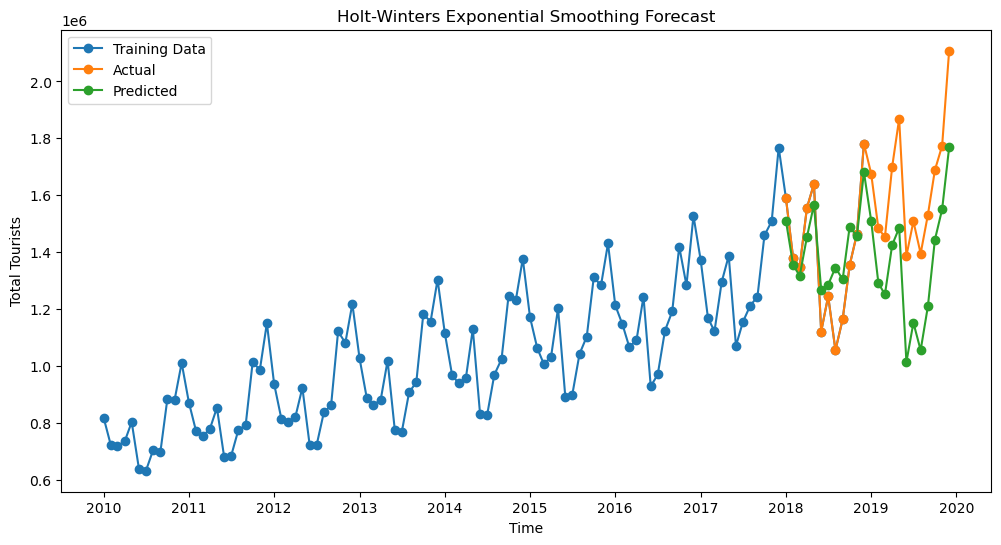

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your dataset (replace 'your_data.csv' with your data file)
# data = df
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))
# Assuming your dataset has columns 'Date' and 'Target' (with 'Date' as a datetime object)
data.set_index('Date', inplace=True)

# Split your data into training and testing (e.g., use 2010-2018 for training and 2019 for testing)
train_data = data['2010-01-01':'2018-12-01']
test_data = data['2018-01-01':'2019-12-01']

# Perform Holt-Winters Exponential Smoothing
# You can adjust the smoothing parameters (alpha, beta, gamma) and seasonal periods (seasonal) based on your data
model = ExponentialSmoothing(train_data['Tourists'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions for 2019
start_date = '2018-01-01'
end_date = '2019-12-01'
predictions = model_fit.predict(start=start_date, end=end_date)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Tourists'], label="Training Data", marker='o')
plt.plot(test_data.index, test_data['Tourists'], label="Actual", marker='o')
plt.plot(predictions.index, predictions, label="Predicted", marker='o')

plt.xlabel("Time")
plt.ylabel("Total Tourists")
plt.legend()
plt.title("Holt-Winters Exponential Smoothing Forecast")
plt.show()


In [13]:
predictions

2018-01-01    1.510867e+06
2018-02-01    1.354572e+06
2018-03-01    1.317130e+06
2018-04-01    1.453516e+06
2018-05-01    1.566830e+06
2018-06-01    1.268879e+06
2018-07-01    1.285981e+06
2018-08-01    1.346049e+06
2018-09-01    1.304434e+06
2018-10-01    1.489751e+06
2018-11-01    1.455437e+06
2018-12-01    1.681780e+06
2019-01-01    1.511090e+06
2019-02-01    1.291570e+06
2019-03-01    1.251583e+06
2019-04-01    1.425312e+06
2019-05-01    1.485437e+06
2019-06-01    1.014442e+06
2019-07-01    1.152271e+06
2019-08-01    1.055938e+06
2019-09-01    1.209770e+06
2019-10-01    1.443629e+06
2019-11-01    1.550625e+06
2019-12-01    1.768332e+06
Freq: MS, dtype: float64

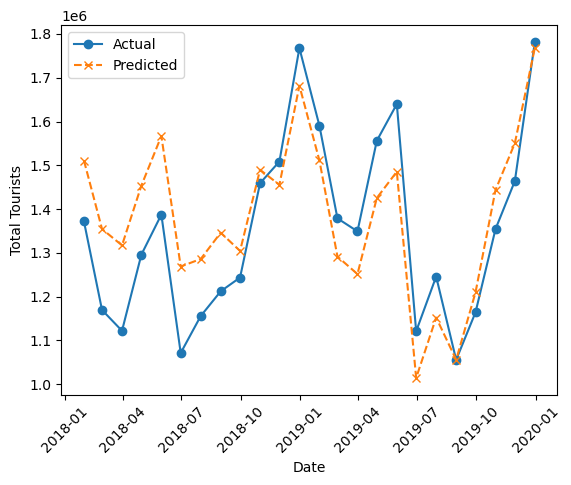

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_act and y_pred are defined
y_act = df.iloc[84:108]["Tourists"]
y_pred = predictions

# Create a date range from January 2018 to December 2019
date_range = pd.date_range(start="2018-01-01", end="2019-12-31", freq="M")

# Use a white theme for the plot
plt.style.use('default')

# Create a plot to display both y_act and y_pred
plt.plot(date_range, y_act, label="Actual", marker='o', linestyle='-')
plt.plot(date_range, y_pred, label="Predicted", marker='x', linestyle='--')

# Label the axes
plt.xlabel("Date")
plt.ylabel("Total Tourists")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate between Actual and Predicted
plt.legend()

# Display the plot
plt.show()


In [27]:
y_act1=y_act[:]
y_pred1=y_pred[:]
y_pred1=y_pred1.reset_index(inplace=False)[:]
y_act1=y_act1.reset_index(inplace=False)[:]
y_pred2=y_pred1.iloc[:,1]
y_act2=y_act1.iloc[:,1]
import numpy as np

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_act2 - y_pred2))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_act2 - y_pred2) ** 2))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_act2 - y_pred2) / y_act2)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 105523.26294291164
RMSE: 118937.09518711212
MAPE: 8.129656360250005
